## Import

In [1]:
# Import
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## Data Load

In [2]:
# Data Load
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 0
다음 그림은 숫자 5 입니다.


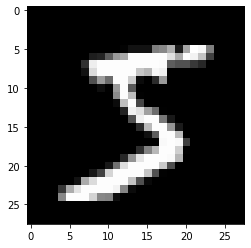

In [5]:
id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## Data Preprocessing

In [7]:
# reshape
print(train_x.shape)

train_x = train_x.reshape([train_x.shape[0], -1])
test_x = test_x.reshape([test_x.shape[0], -1])

print(train_x.shape)

(60000, 28, 28)
(60000, 784)


In [8]:
# Min Max Scaling : Scikit-learn에서는 2차원 데이터만 지원
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 255 / min : 0


In [9]:
max_n, min_n = train_x.max(), train_x.min()

max_n, min_n

(255, 0)

In [10]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [11]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


In [12]:
# One-Hot Encoding
train_y.shape

(60000,)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [15]:
len_y = len(set(train_y))

len_y

10

In [16]:
print(train_y.shape)

train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

print(train_y.shape)


(60000,)
(60000, 10)


## Modeling

In [17]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [18]:
# Modeling : Sequential

# 1. Session Clear
keras.backend.clear_session()

# 2. Model
model = keras.models.Sequential()

# 3. Model Add
model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(10, activation='softmax') )

# 4. Compile
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [19]:
# Summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Early Stopping

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
es = EarlyStopping(monitor='val_loss', # 관측 대상
                   min_delta=0,        # 0: 성능이 하락하지 않으면 패스
                   patience=5,         # 중요) 모델이 개선되지 않는 상태를 몇번이나 넘어갈지
                   verbose=1,
                   restore_best_weights=True) # 중요) 학습이 멈췄을 때, 최적의 가중치로 전환 (반드시 True)

In [22]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 6s 2ms/step - loss: 0.3814 - accuracy: 0.8923 - val_loss: 0.3448 - val_accuracy: 0.9068
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3444 - accuracy: 0.9076 - val_loss: 0.3376 - val_accuracy: 0.9082
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3323 - accuracy: 0.9105 - val_loss: 0.3166 - val_accuracy: 0.9184
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3275 - accuracy: 0.9120 - val_loss: 0.3485 - val_accuracy: 0.9128
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3284 - accuracy: 0.9139 - val_loss: 0.3499 - val_accuracy: 0.9107
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3226 - accuracy: 0.9146 - val_loss: 0.3536 - val_accuracy: 0.9097
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3183 - accuracy: 0.9159 - val_loss: 0.3754 - val_accuracy:

In [23]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 92.24%
테스트 정확도 : 91.71%


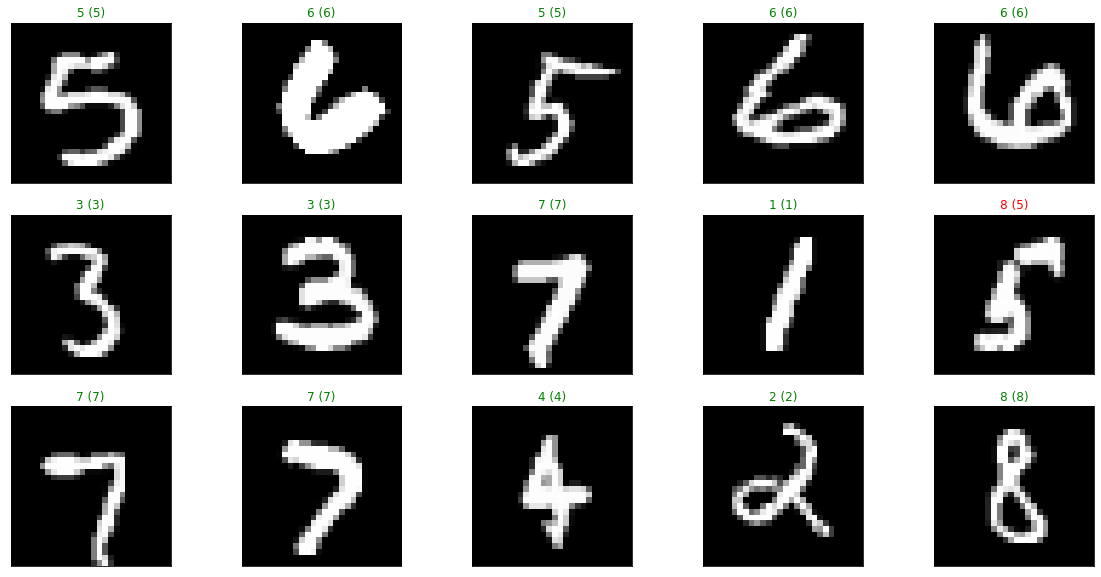

In [24]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 950
다음 그림은 숫자 7 입니다.
모델의 예측 : 2
모델의 카테고리별 확률 : [ 0.  0. 83.  0.  0.  0.  0.  0.  2. 13.]
틀렸어요


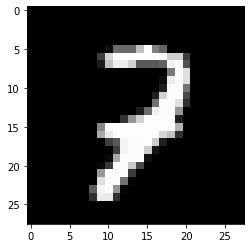

In [25]:
# 틀린 것을 확인해보기
true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [26]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.9171


[0.3250808119773865, 0.9171000123023987]

## Hidden Layer 추가

In [27]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [28]:
# Modeling : Sequential

# 1. Session Clear
keras.backend.clear_session()

# 2. Model
model = keras.models.Sequential()

# 3. Model Add
model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(10, activation='softmax') )

# 4. Compile
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [29]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [30]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [31]:
# 5. fit
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3567 - accuracy: 0.9016 - val_loss: 0.2473 - val_accuracy: 0.9383
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2436 - accuracy: 0.9398 - val_loss: 0.2455 - val_accuracy: 0.9403
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2134 - accuracy: 0.9476 - val_loss: 0.1870 - val_accuracy: 0.9539
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1692 - accuracy: 0.9583 - val_loss: 0.1919 - val_accuracy: 0.9559
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1824 - accuracy: 0.9576 - val_loss: 0.1816 - val_accuracy: 0.9597
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1676 - accuracy: 0.9616 - val_loss: 0.1923 - val_accuracy: 0.9578
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1563 - accuracy: 0.9652 - val_loss: 0.2311 - val_accuracy:

In [32]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 96.75%
테스트 정확도 : 96.16%


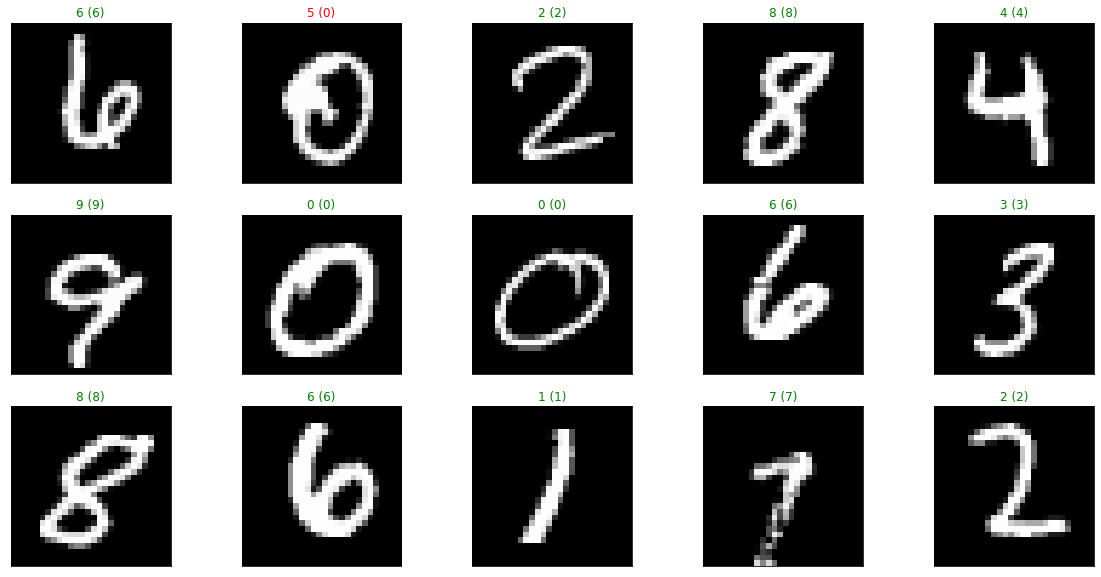

In [33]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 4363
다음 그림은 숫자 9 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 0.  0.  0. 22.  0. 46.  0.  2. 11. 13.]
틀렸어요


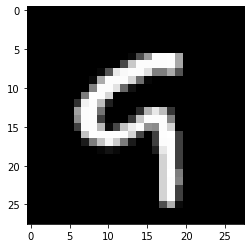

In [34]:
# 틀린 것을 확인해보기
true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [35]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.1743 - accuracy: 0.9616


[0.17428098618984222, 0.9616000056266785]